In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import functions

In [65]:
# take one example file 
start = 50000
end = 150000
path = '/Volumes/T7 Shield/202409_paper2_modelruns/30years/TL_data/1landcover_20percent/langtang_climate_cut/12a/'
df = pd.read_csv(path + 'Sediment.out')[start:end]
df['D'] = pd.to_datetime(df['D'])
df = df.set_index('D')
df


hyd = pd.read_csv(path + 'Hydro.out')[start:end]
hyd['D'] = pd.to_datetime(hyd['D'])
hyd = hyd.set_index('D')


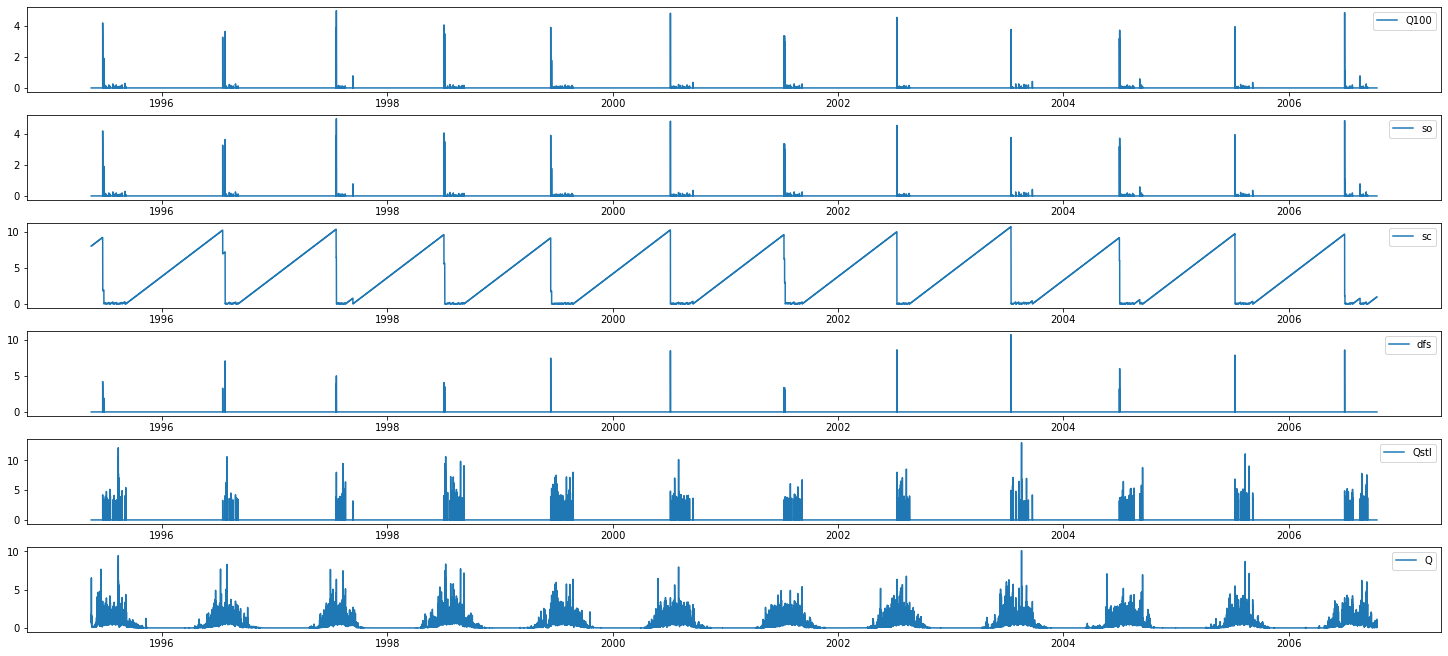

In [68]:
fig = plt.figure(figsize=(20, 9), layout='constrained')
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            eee
                            jjj
                            ''')

mosaic['a'].plot(df.Q100, label = 'Q100')
mosaic['b'].plot(df.so, label = 'so')
mosaic['c'].plot(df.sc, label = 'sc')
mosaic['d'].plot(df.dfs, label = 'dfs')
mosaic['e'].plot(df.Qstl, label = 'Qstl')

mosaic['j'].plot(hyd.Q, label = 'Q')

mosaic['a'].legend()
mosaic['b'].legend()
mosaic['c'].legend()
mosaic['d'].legend()
mosaic['e'].legend()
mosaic['j'].legend()




In [ ]:
def get_dates_ready(df):
    df['D'] = pd.to_datetime(df['D'])
    df = df.set_index('D')
    return df
    

In [76]:
import os
import pandas as pd
import matplotlib.pyplot as plt

percentile = '30percent'
method = 'once'
location = 'mustang'

# Define the main directory containing subfolders
main_dir = f'/Volumes/T7 Shield/202409_paper2_modelruns/30years/SL_{method}/1landcover_{percentile}/{location}_climate_cut/'
output_dir = f'/Volumes/T7 Shield/202409_paper2_modelruns/time_series_plots/{location}{percentile}_{method}/'  

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define the start and end indices
start = 50000
end = 150000

# Loop through each subfolder
for folder in sorted(os.listdir(main_dir)):  # Sorted to maintain order
    folder_path = os.path.join(main_dir, folder)
    
    # Ensure it's a directory
    if not os.path.isdir(folder_path):
        continue

    print(f"Processing: {folder}")

    # Construct file paths
    sediment_file = os.path.join(folder_path, 'Sediment.out')
    hydro_file = os.path.join(folder_path, 'Hydro.out')

    # Check if required files exist
    if not os.path.exists(sediment_file) or not os.path.exists(hydro_file):
        print(f"Skipping {folder}, missing files")
        continue

    # Read and process data
    df = pd.read_csv(sediment_file)[start:end]
    hyd = pd.read_csv(hydro_file)[start:end]

    # Convert 'D' column to datetime and set as index
    df['D'] = pd.to_datetime(df['D'])
    df = df.set_index('D')

    hyd['D'] = pd.to_datetime(hyd['D'])
    hyd = hyd.set_index('D')

    # Create output folder for this subfolder
    # save_folder = os.path.join(output_dir, folder)
    # os.makedirs(save_folder, exist_ok=True)

    # Create plot
    fig = plt.figure(figsize=(20, 9), layout='constrained')
    mosaic = fig.subplot_mosaic('''
                                aaa
                                bbb
                                ccc
                                ddd
                                eee
                                jjj
                                ''')

    mosaic['a'].plot(df.Q100, label='Q100')
    mosaic['b'].plot(df.so, label='so')
    mosaic['c'].plot(df.sc, label='sc')
    mosaic['d'].plot(df.dfs, label='dfs')
    mosaic['e'].plot(df.Qstl, label='Qstl')
    mosaic['j'].plot(hyd.Q, label='Q')

    for key in mosaic:
        mosaic[key].legend()

    # Save plot
    save_path = os.path.join(output_dir, f'{folder}_plot.png')
    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"Saved plot to {save_path}")

print("Processing complete.")


Processing: 13a
Saved plot to /Volumes/T7 Shield/202409_paper2_modelruns/time_series_plots/mustang30percent_once/13a_plot.png
Processing: 13b
Saved plot to /Volumes/T7 Shield/202409_paper2_modelruns/time_series_plots/mustang30percent_once/13b_plot.png
Processing: 13c
Saved plot to /Volumes/T7 Shield/202409_paper2_modelruns/time_series_plots/mustang30percent_once/13c_plot.png
Processing: 13d
Saved plot to /Volumes/T7 Shield/202409_paper2_modelruns/time_series_plots/mustang30percent_once/13d_plot.png
Processing: 14a
Saved plot to /Volumes/T7 Shield/202409_paper2_modelruns/time_series_plots/mustang30percent_once/14a_plot.png
Processing: 14b
Saved plot to /Volumes/T7 Shield/202409_paper2_modelruns/time_series_plots/mustang30percent_once/14b_plot.png
Processing: 14c
Saved plot to /Volumes/T7 Shield/202409_paper2_modelruns/time_series_plots/mustang30percent_once/14c_plot.png
Processing: 14d
Saved plot to /Volumes/T7 Shield/202409_paper2_modelruns/time_series_plots/mustang30percent_once/14d_p